In [1]:
import Dataloader
import EdgeDetect as mg
import performancetest as pt
import keras
import pickle

Pavement crack detection using the Gabor filter
https://ieeexplore.ieee.org/document/6728529

In [2]:

train_imgs, train_probs, train_types, test_imgs, test_probs, test_types = \
        Dataloader.load_and_preprocess_dataset(out_types="All", wire_removal="Crop", augment="None", aug_types=["Flip"], crop_pix=20, shuffle=True, balance_probs=2)
        #Dataloader.load_and_preprocess_dataset(out_types="Poly", wire_removal="Crop", augment="All", aug_types=["Flip"], crop_pix=20, shuffle=True, balance_probs=2)

1508 295 106 715
----- Method:[reduce_dataset], ran in 0.0 Seconds,
1508 295 106 715
----- Method:[remove_cell_wires], ran in 0.8364748954772949 Seconds,
----- Method:[split_t_t_data], ran in 0.35930371284484863 Seconds,
1131 221 80 535
377 74 26 180
----- Method:[shuffle_set], ran in 0.08402323722839355 Seconds,
----- Method:[balance_prob_nums], ran in 0.024007081985473633 Seconds,
160 160 80 160
377 74 26 180
----- Method:[load_and_preprocess_dataset], ran in 5.690600395202637 Seconds,


In [3]:
model = mg.initialize_model()

In [4]:
history = mg.train_model(model, train_imgs, train_probs, filename="Edge-Detect-Model",  epochs=800, batch_size=1000)
mg.save_history(history, "Edge-Detect-Model")

e
1
a
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
b
d
Epoch 1/800
1/1 [==============================] - 8s 8s/step - loss: 1.3881 - accuracy: 0.3810 - val_loss: 1.3881 - val_accuracy: 0.0000e+00
Epoch 2/800
1/1 [==============================] - 6s 6s/step - loss: 1.3835 - accuracy: 0.3810 - val_loss: 1.3901 - val_accuracy: 0.0000e+00
Epoch 3/800
1/1 [==============================] - 7s 7s/step - loss: 1.3808 - accuracy: 0.3810 - val_loss: 1.3921 - val_accuracy: 0.0000e+00
Epoch 4/800
1/1 [==============================] - 7s 7s/step - loss: 1.3782 - accuracy: 0.3810 - val_loss: 1.3945 - val_accuracy: 0.0000e+00
Epoch 5/800
1/1 [==============================] - 7s 7s/step - loss: 1.3754 - accuracy: 0.3810 - val_loss: 1.3969 - val_accuracy: 0.0000e+00
Epoch 6/800
1/1 [==============================] - 7s 7s/step - loss: 1.3727 - accuracy: 0.3810 - val_loss: 1.3996 - val_accuracy: 0.0000

In [7]:
model = keras.models.load_model('../models/Edge-Detect-Model.keras')
history = keras.callbacks.History()
with open("../histories/Edge-Detect-Model", "rb") as fp:   # Unpickling
     history.history = pickle.load(fp)

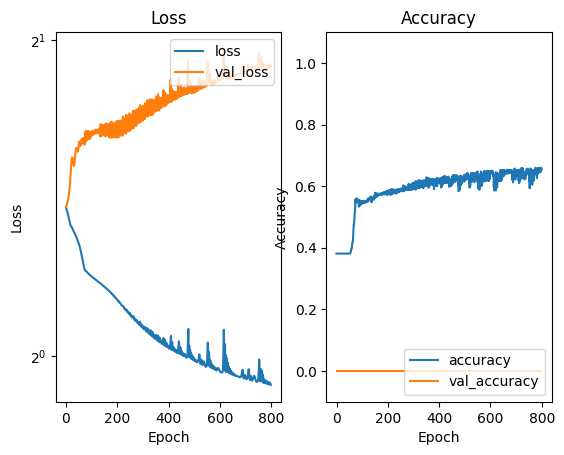

In [8]:
pt.plot_train_data(history)

In [9]:
y_true_m, y_true_p, y_predict_m, y_predict_p = pt.predict_results(mg.predict, model, test_imgs, test_probs, test_types)

e
1
a
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
b
d
9/9 [==============================] - 1s 89ms/step
e
1
a
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
b
d
13/13 [==============================] - 1s 87ms/step


Mono Results     |  Accuracy: 0.65428  Precision: 0.64633  Recall: 0.39447  F1: 0.35434
Poly Results     |  Accuracy: 0.65206  Precision: 0.63066  Recall: 0.38745  F1: 0.3444
Combined Results |  Accuracy: 0.65297  Precision: 0.63719  Recall: 0.39044  F1: 0.34873


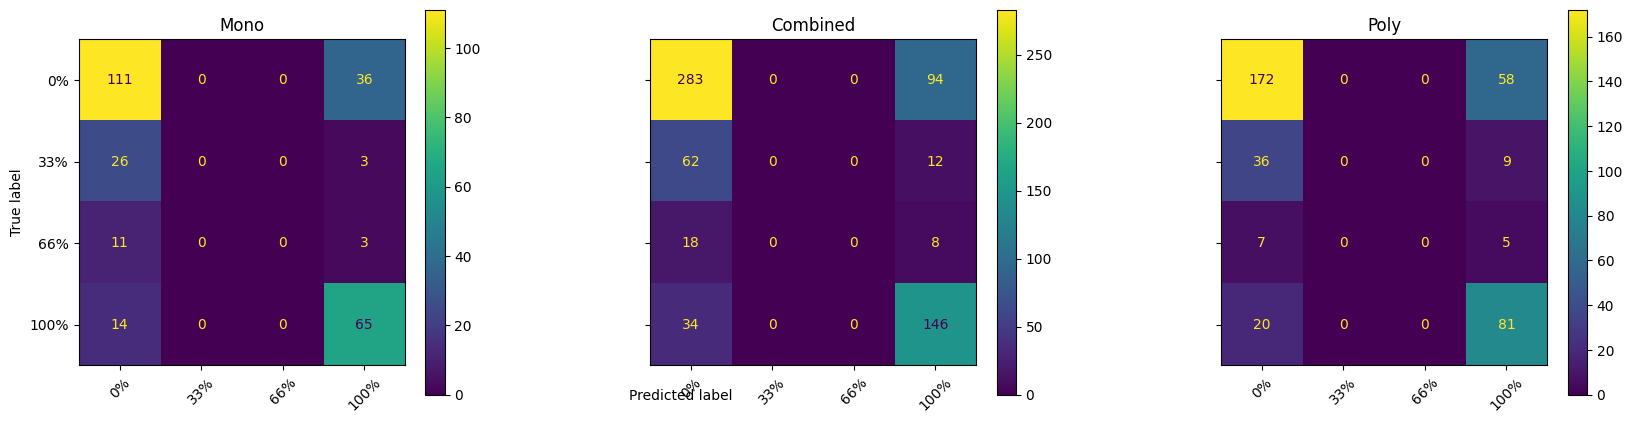

In [10]:
pt.display_results(y_true_m, y_true_p, y_predict_m, y_predict_p)